In [1]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab
import skimage.io as io

from pycocotools.coco import COCO
from shutil import copyfile
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [67]:
data_dir='/Users/matt/masters_thesis/dataset_info'
data_type='train2017'
ann_file='{}/annotations/instances_{}.json'.format(data_dir, data_type)
filtered_dataset = '/Users/matt/masters_thesis/dataset_info/dataset/'
save_data_path = '/Users/matt/masters_thesis/dataset/dataset'

In [68]:
if not os.path.exists(save_data_path):
    os.makedirs(save_data_path)

In [69]:
# initialize COCO api for instance annotations# initi 
coco=COCO(ann_file)

loading annotations into memory...
Done (t=36.17s)
creating index...
index created!


In [70]:
# get all images containing person
cat_ids = coco.getCatIds(catNms=['person'])

In [71]:
# get images ids
img_ids = coco.getImgIds(catIds=cat_ids)
# get images
imgs = coco.loadImgs(img_ids)

In [72]:
def map_paths(file_name):
    dataset_path = os.path.join(filtered_dataset, file_name)
    save_path = os.path.join(save_data_path, file_name)
    mask_name = os.path.join(save_data_path, '{}_mask.jpg'.format(file_name.split('.')[0]))
    return dataset_path, save_path, mask_name

In [74]:
for img in imgs:
    ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    final_mask = None
    for ann in anns:
        mask = coco.annToMask(ann)
        if final_mask is None:
            final_mask = mask
        else:
            final_mask += mask
    
    #rescale to 0-255
    final_mask *= 255
    from_path, to_path, mask_path = map_paths(img['file_name'])
    if not os.path.isfile(from_path):
        continue
    try:
        copyfile(from_path, to_path)
        cv.imwrite(mask_path, final_mask)
    except:
        print('Could not copy: {}'.format(from_path))
    

In [18]:
annIds = coco.getAnnIds(imgIds=imgs[0]['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [19]:
float(anns[0]['area'])/(427*640)

0.008006756806206087

In [20]:
imgs[0]

{'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
 'date_captured': '2013-11-20 16:28:24',
 'file_name': '000000532481.jpg',
 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
 'height': 426,
 'id': 532481,
 'license': 3,
 'width': 640}

In [60]:
img = list(filter(lambda x: x['file_name'] == '000000500565.jpg', imgs))[0]

In [61]:
ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(ann_ids)

In [62]:
final_mask = None
for ann in anns:
    mask = coco.annToMask(ann)
    if final_mask is None:
        final_mask = mask
    else:
        final_mask += mask

In [63]:
final_mask *= 255

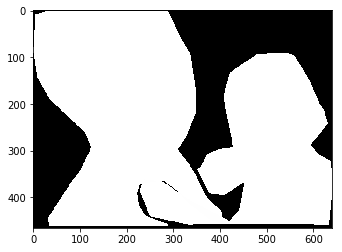

In [64]:
plt.imshow(final_mask.astype(np.uint8), cmap='gray')